# Výzva: Analyzovanie textu o dátovej vede

V tomto príklade si urobíme jednoduché cvičenie, ktoré pokrýva všetky kroky tradičného procesu dátovej vedy. Nemusíte písať žiadny kód, stačí kliknúť na bunky nižšie, aby ste ich vykonali, a pozorovať výsledok. Ako výzvu vás povzbudzujeme, aby ste tento kód vyskúšali s rôznymi údajmi.

## Cieľ

V tejto lekcii sme diskutovali o rôznych konceptoch súvisiacich s dátovou vedou. Skúsme objaviť ďalšie súvisiace koncepty pomocou **textovej analýzy**. Začneme s textom o dátovej vede, extrahujeme z neho kľúčové slová a potom sa pokúsime vizualizovať výsledok.

Ako text použijeme stránku o dátovej vede z Wikipédie:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Krok 1: Získanie údajov

Prvým krokom v každom procese dátovej vedy je získanie údajov. Na tento účel použijeme knižnicu `requests`:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Krok 2: Transformácia údajov

Ďalším krokom je konverzia údajov do formy vhodnej na spracovanie. V našom prípade sme stiahli zdrojový kód HTML zo stránky a potrebujeme ho previesť na čistý text.

Existuje mnoho spôsobov, ako to urobiť. Použijeme najjednoduchší zabudovaný objekt [HTMLParser](https://docs.python.org/3/library/html.parser.html) z Pythonu. Musíme zdediť triedu `HTMLParser` a definovať kód, ktorý bude zhromažďovať všetok text vo vnútri HTML značiek, okrem značiek `<script>` a `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Krok 3: Získavanie poznatkov

Najdôležitejším krokom je premeniť naše dáta na formu, z ktorej môžeme získať poznatky. V našom prípade chceme extrahovať kľúčové slová z textu a zistiť, ktoré kľúčové slová majú väčší význam.

Použijeme Python knižnicu s názvom [RAKE](https://github.com/aneesha/RAKE) na extrakciu kľúčových slov. Najprv si túto knižnicu nainštalujeme, ak ju ešte nemáme:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Hlavná funkcionalita je dostupná z objektu `Rake`, ktorý môžeme prispôsobiť pomocou niektorých parametrov. V našom prípade nastavíme minimálnu dĺžku kľúčového slova na 5 znakov, minimálnu frekvenciu kľúčového slova v dokumente na 3 a maximálny počet slov v kľúčovom slove na 2. Neváhajte experimentovať s inými hodnotami a pozorovať výsledok.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Získali sme zoznam pojmov spolu s ich priradenou mierou dôležitosti. Ako môžete vidieť, najrelevantnejšie disciplíny, ako sú strojové učenie a big data, sa nachádzajú na popredných miestach v zozname.

## Krok 4: Vizualizácia výsledku

Ľudia najlepšie interpretujú údaje vo vizuálnej podobe. Preto často dáva zmysel vizualizovať údaje, aby sme získali určité poznatky. Na jednoduché zobrazenie distribúcie kľúčových slov s ich relevanciou môžeme použiť knižnicu `matplotlib` v Pythone:


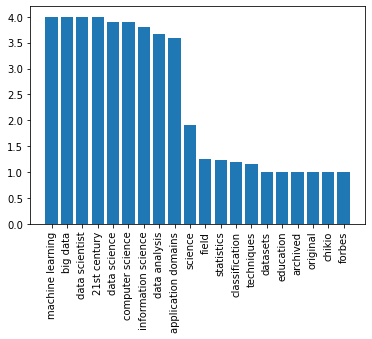

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Existuje však ešte lepší spôsob, ako vizualizovať frekvencie slov - pomocou **Word Cloud**. Budeme musieť nainštalovať ďalšiu knižnicu na vykreslenie word cloudu z nášho zoznamu kľúčových slov.


In [71]:
!{sys.executable} -m pip install wordcloud

Objekt `WordCloud` je zodpovedný za prijatie buď pôvodného textu, alebo vopred vypočítaného zoznamu slov s ich frekvenciami, a vráti obrázok, ktorý môže byť následne zobrazený pomocou `matplotlib`:


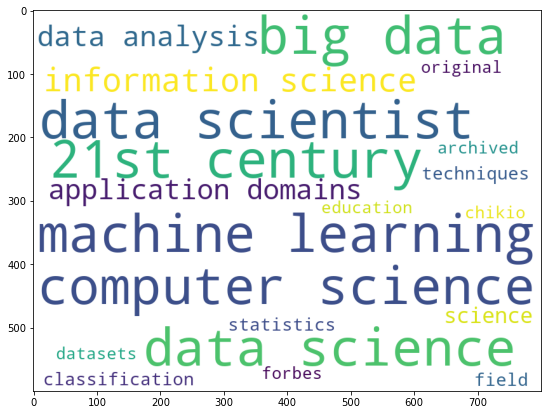

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Môžeme tiež odovzdať pôvodný text do `WordCloud` - pozrime sa, či dokážeme dosiahnuť podobný výsledok:


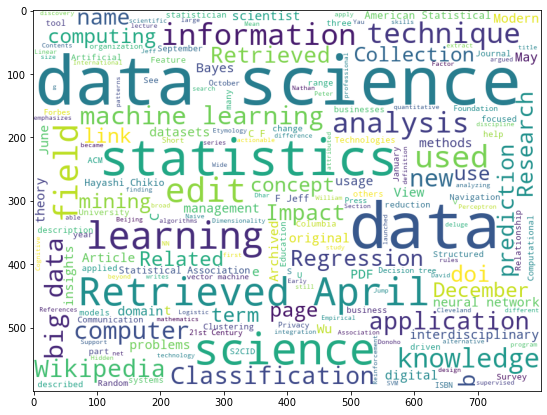

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Môžete vidieť, že slovný mrak teraz vyzerá pôsobivejšie, ale obsahuje aj veľa šumu (napr. nesúvisiace slová ako `Retrieved on`). Taktiež získavame menej kľúčových slov, ktoré pozostávajú z dvoch slov, ako napríklad *data scientist* alebo *computer science*. Je to preto, že algoritmus RAKE odvádza oveľa lepšiu prácu pri výbere vhodných kľúčových slov z textu. Tento príklad ilustruje dôležitosť predspracovania a čistenia údajov, pretože jasný obraz na konci nám umožní robiť lepšie rozhodnutia.

V tomto cvičení sme prešli jednoduchým procesom extrakcie významu z textu na Wikipédii vo forme kľúčových slov a slovného mraku. Tento príklad je pomerne jednoduchý, ale dobre demonštruje všetky typické kroky, ktoré dátový analytik podnikne pri práci s údajmi, od získavania údajov až po vizualizáciu.

V našom kurze si všetky tieto kroky podrobne rozoberieme.



---

**Upozornenie**:  
Tento dokument bol preložený pomocou služby na automatický preklad [Co-op Translator](https://github.com/Azure/co-op-translator). Hoci sa snažíme o presnosť, upozorňujeme, že automatické preklady môžu obsahovať chyby alebo nepresnosti. Pôvodný dokument v jeho pôvodnom jazyku by mal byť považovaný za autoritatívny zdroj. Pre kritické informácie sa odporúča profesionálny ľudský preklad. Nezodpovedáme za žiadne nedorozumenia alebo nesprávne interpretácie vyplývajúce z použitia tohto prekladu.
